# Machine Learning topological phases in real space: Nearest-neighbours SSH model 6561_70.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 404 ms, sys: 27.8 ms, total: 432 ms
Wall time: 431 ms


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_70.csv"
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.2 s, sys: 1.02 s, total: 14.2 s
Wall time: 13.5 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  140
n_hamiltonians:  6561
n_ts:  2
CPU times: user 830 µs, sys: 63 µs, total: 893 µs
Wall time: 625 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.846822130772748
% val:  0.0
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  5556
number of val hamiltonians:  0
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [27:45<00:00, 15.78s/it]

CPU times: user 31min 2s, sys: 29.4 s, total: 31min 31s
Wall time: 27min 45s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.031465,0.015874,...,0.111140,-0.115854,0.095882,-0.104443,0.073811,-0.085611,0.046495,-0.060694,0.015874,-0.031465
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.036551,0.018500,...,-0.117439,0.119091,-0.105692,0.112937,-0.083745,0.095882,-0.053715,0.069574,-0.018500,0.036551
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.041564,-0.021117,...,-0.119032,0.116440,-0.112937,0.117851,-0.092640,0.104443,-0.060694,0.077902,-0.021117,0.041564
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.046495,-0.023723,...,0.115854,-0.108033,0.117439,-0.119032,0.100387,-0.111140,0.067403,-0.085611,0.023723,-0.046495
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.051333,0.026317,...,0.108033,-0.094285,0.119091,-0.116440,0.106889,-0.115854,0.073811,-0.092640,0.026317,-0.051333


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 134 ms, sys: 14 µs, total: 134 ms
Wall time: 133 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
479896,3427,H_0.1_-0.75_1.00236.dat,0.10,-0.75,1.002361,1,1,val,0.115291,0.015794,...,-0.111503,-0.027702,-0.071016,0.104833,0.073977,0.083098,0.110107,-0.060922,-0.015794,-0.115291
414334,2959,H_-0.2_0.15_0.00114689.dat,-0.20,0.15,0.001147,0,0,val,0.116358,-0.104032,...,0.112512,-0.059603,-0.014399,0.088319,-0.118492,0.096285,-0.034816,-0.048328,0.104032,-0.116358
423199,3022,H_-0.15_-0.75_1.00334.dat,-0.15,-0.75,1.003345,1,1,val,-0.117659,0.023896,...,-0.094204,0.075854,0.088964,0.077595,0.062937,-0.103126,-0.111084,-0.041352,-0.023896,0.117659
93827,670,H_-1.6_-0.9_-0.00342772.dat,-1.60,-0.90,-0.003428,0,0,val,0.069376,-0.046454,...,-0.029445,0.003408,-0.091137,0.072116,-0.118630,0.113762,-0.101606,0.112717,-0.046454,0.069376
249148,1779,H_-0.95_1.9_1.00178.dat,-0.95,1.90,1.001784,1,1,val,-0.108036,-0.059550,...,0.090119,-0.070965,-0.032443,-0.117230,-0.117835,-0.029186,-0.068225,0.092296,0.059550,0.108036
716656,5118,H_1.15_-1.25_0.996825.dat,1.15,-1.25,0.996825,1,1,val,-0.018020,-0.101430,...,0.046410,0.082324,0.062553,0.068153,0.077315,0.052477,0.090370,0.035642,0.101430,0.018020
691799,4941,H_1.05_-2_1.00175.dat,1.05,-2.00,1.001755,1,1,val,0.016417,-0.017763,...,0.046779,0.076072,0.031215,0.062635,0.015068,0.048029,-0.001360,0.032527,-0.017763,0.016417
29691,212,H_-1.9_0.5_0.000557411.dat,-1.90,0.50,0.000557,0,0,val,-0.030919,-0.041273,...,0.116930,0.114728,0.108009,0.103103,0.091592,0.084323,0.068821,0.059692,0.041273,0.030919
16415,117,H_-1.95_-0.2_-0.000305652.dat,-1.95,-0.20,-0.000306,0,0,val,0.088296,-0.094472,...,0.107683,-0.103259,-0.034875,0.025497,-0.061105,0.069206,0.116486,-0.117928,-0.094472,0.088296
791044,5650,H_1.45_1.05_-0.00694948.dat,1.45,1.05,-0.006949,0,0,train,-0.089073,-0.056505,...,0.079874,0.105340,-0.013059,0.028408,-0.097197,-0.067657,-0.115871,-0.118154,-0.056505,-0.089073


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [1905, 1267, 3519, 2964, 627, 5753, 5022, 4044, 6003, 3983, 3532, 4236, 1566, 3516, 5016, 1856, 1991, 1286, 3028, 4456, 2007, 3812, 2690, 4249, 4970, 525, 2077, 5141, 4588, 4283, 4690, 1426, 4319, 4701, 60, 2355, 34, 1501, 921, 5043, 1831, 6299, 4254, 2688, 581, 3922, 4648, 5047, 4472, 6177, 6333, 3733, 2038, 2768, 235, 1429, 1293, 4652, 2313, 314, 6030, 914, 4049, 2027, 533, 4341, 2711, 4902, 4496, 5650, 1082, 6275, 4499, 5056, 2923, 5062, 3446, 4576, 1708, 6165, 597, 4439, 4473, 5854, 1186, 1273, 596, 2864, 2995, 785, 1853, 2647, 4466, 3393, 1425, 2358, 5176, 1794, 2519, 420, 6031, 308, 3712, 3006, 54, 4810, 1210, 3643, 1462, 3230, 422, 6130, 1612, 516, 4804, 3447, 6416, 232, 2487, 1712, 4461, 2645, 3980, 4892, 4549, 11

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 207 µs, sys: 0 ns, total: 207 µs
Wall time: 157 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.421429,0.578571,0,1
1,-2.0,-1.95,test,0.714286,0.285714,0,0
2,-2.0,-1.90,test,0.814286,0.185714,0,0
3,-2.0,-1.85,test,0.864286,0.135714,0,0
4,-2.0,-1.80,test,0.900000,0.100000,0,0
5,-2.0,-1.75,test,0.950000,0.050000,0,0
6,-2.0,-1.70,test,0.957143,0.042857,0,0
7,-2.0,-1.65,test,0.964286,0.035714,0,0
8,-2.0,-1.60,test,0.978571,0.021429,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  918540


,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,1,test
2,0,0,1,test
3,0,0,1,test
4,0,0,1,test
5,0,0,0,test
6,0,0,1,test
7,0,0,1,test
8,0,0,0,test
9,0,0,0,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9993285714285715,
 'eigenvector_test': 0.7986425017768302,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.844776119402985}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

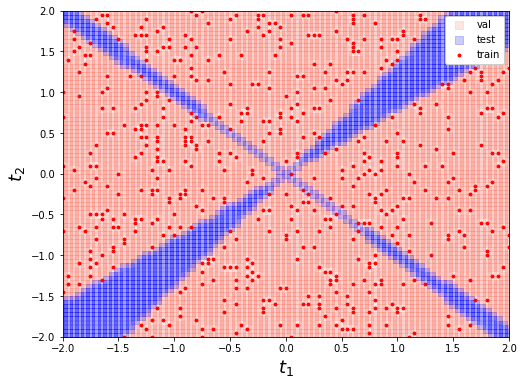

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [15]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [16]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [17]:
experiment.print_train_val_test()

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


#### Viewing dataset summary

In [18]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.507919
1    0.492081
Name: phase, dtype: float64


total train/val phases: 
0    2822
1    2734
Name: phase, dtype: int64


Summary of test data

% test phases: 
0    0.536318
1    0.463682
Name: phase, dtype: float64


total test phases: 
0    539
1    466
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
0    0.512269
1    0.487731
Name: phase, dtype: float64


total phases: 
0    3361
1    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [19]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,1,test
2,0,0,0,test
3,0,0,0,test
4,0,0,0,test


#### Vieweng Hamiltonian summary

In [20]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.707143,0.292857,0,0
1,-2.0,-1.95,test,0.778571,0.221429,0,0
2,-2.0,-1.90,test,0.792857,0.207143,0,0
3,-2.0,-1.85,test,0.835714,0.164286,0,0
4,-2.0,-1.80,test,0.878571,0.121429,0,0


#### Viewing accuracy

In [21]:
experiment.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9993442857142857,
 'eigenvector_test': 0.818542999289268,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.981094527363184}

#### Visualizing train/val/test splits with scatter plot

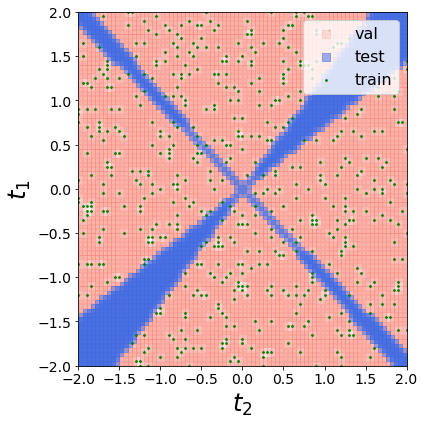

In [22]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

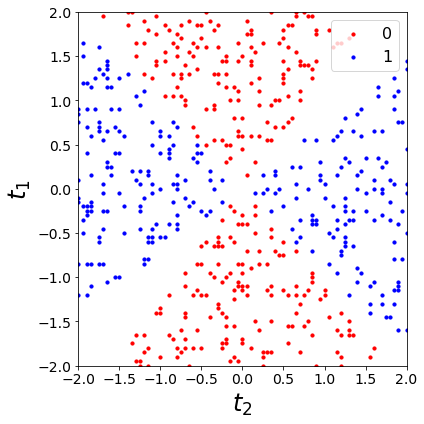

In [23]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

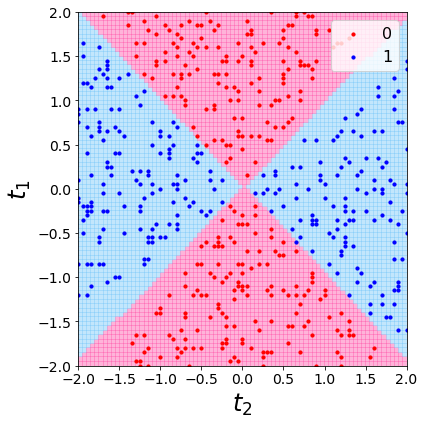

In [24]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

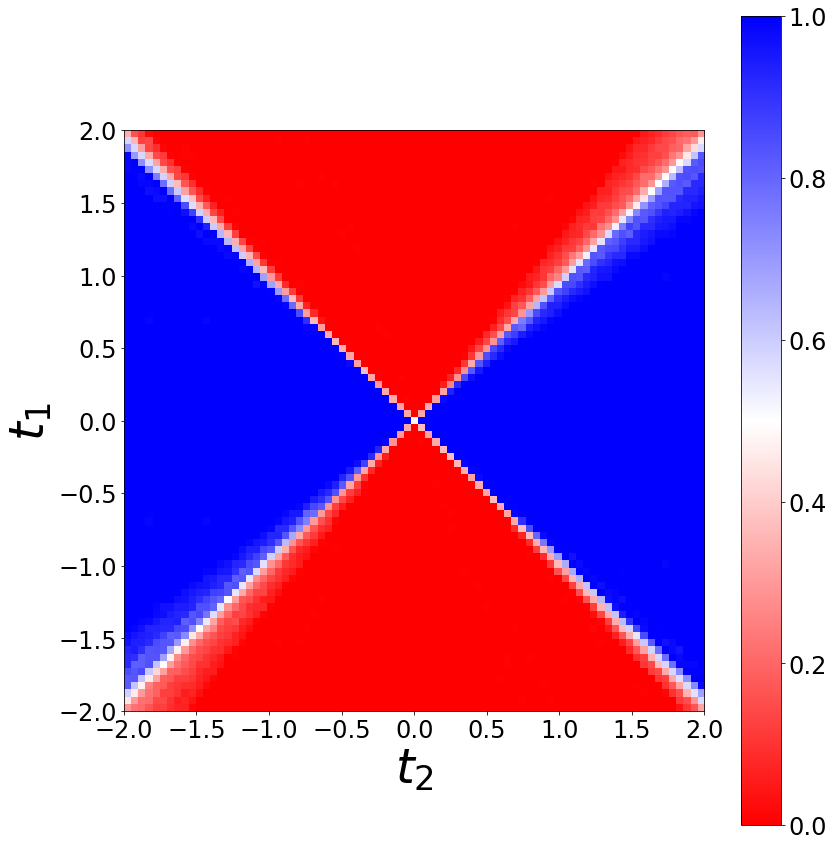

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 133264.38it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


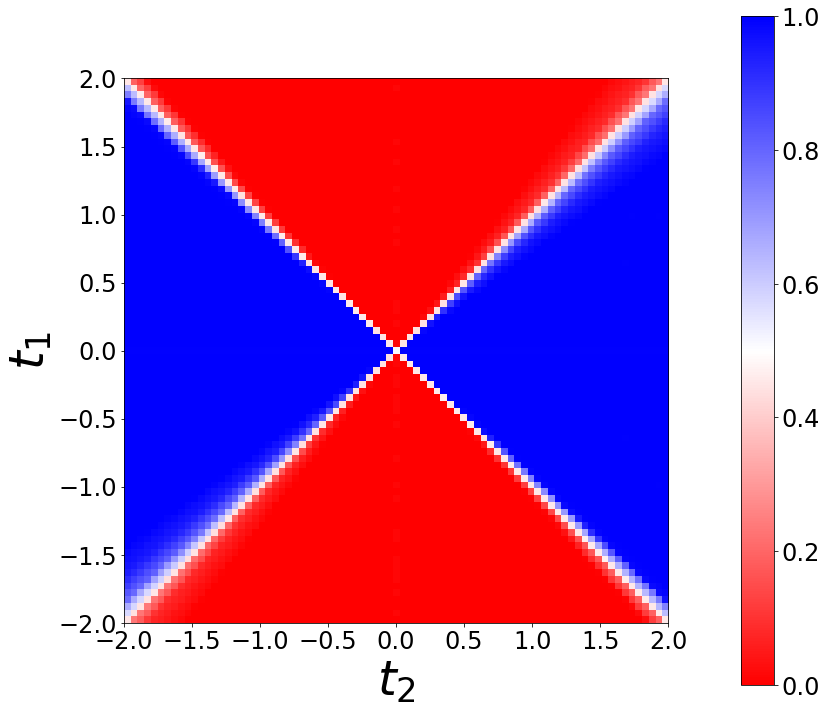

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9991100857142857,
 'eigenvector_test': 0.8185098081023454,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9339203980099501}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9990049751243781}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 1780.48it/s]

Sorted feature importances:  [(138, 0.20184846301790688), (1, 0.11308521499370362), (0, 0.07097172184403883), (136, 0.054593427814619136), (69, 0.05291672982170897), (71, 0.0442480970988345), (139, 0.03802866770090307), (68, 0.03645470504473173), (70, 0.033707746750062606), (92, 0.030222309397673227), (3, 0.029943015066108823), (5, 0.022496864235013337), (134, 0.02246479040366897), (130, 0.01599995281925354), (46, 0.013952835976810574), (47, 0.011322228567824031), (9, 0.00943854994756382), (93, 0.007352718714344208), (137, 0.00493561124958262), (128, 0.004890212769497049), (28, 0.00417491125686278), (49, 0.0038065629118739005), (2, 0.0036854030240705336), (100, 0.0033958902453075247), (73, 0.0031640176328478114), (8, 0.003116518310505529), (17, 0.002760640967926784), (120, 0.0027310014003588665), (37, 0.002654822252710857), (4, 0.0026216904153533514), (66, 0.0025479059523278937), (125, 0.0025091801335082762), (29, 0.002508027719987705), (48, 0.0024770356396320407), (122, 0.002423252116

#### Plotting feature importances

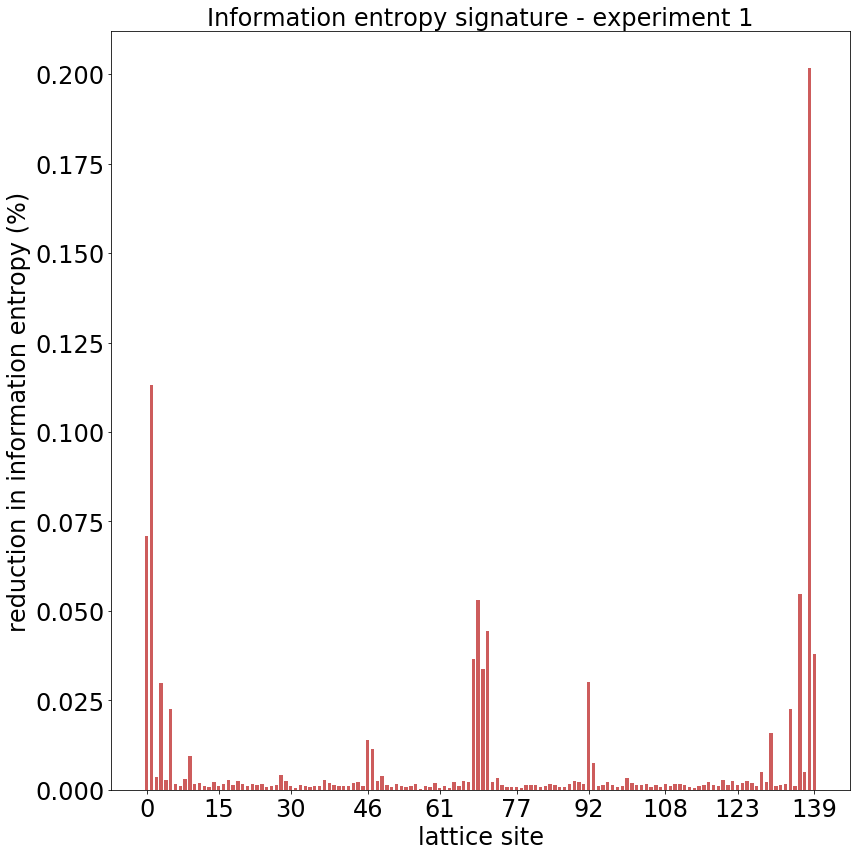

In [32]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,139,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

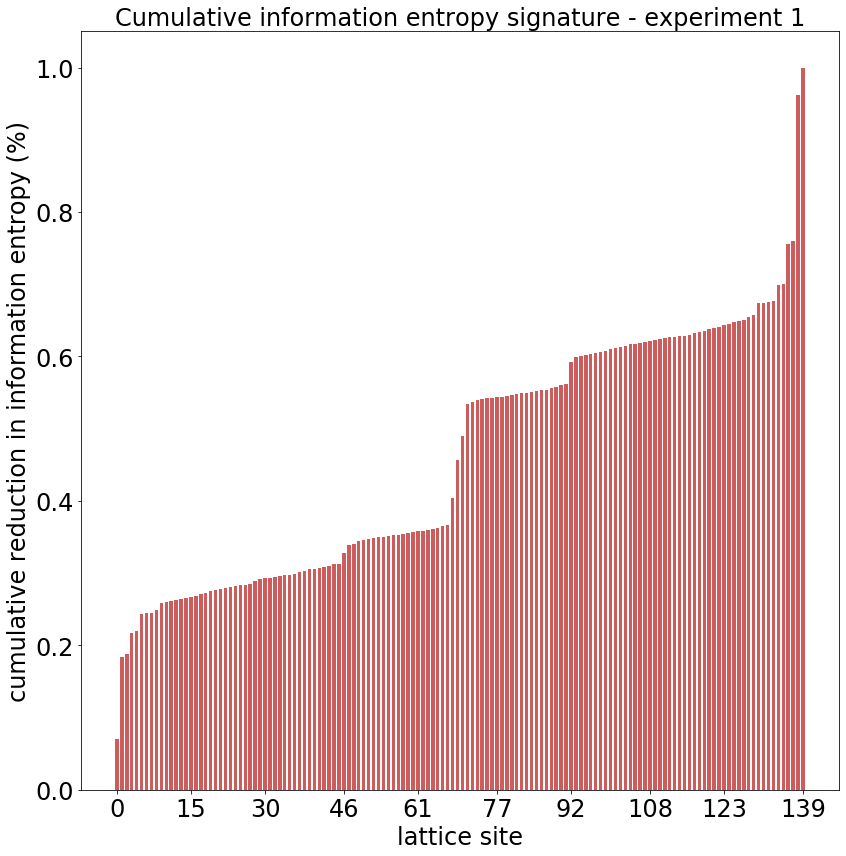

In [33]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,139,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features: 1,138

We now rerun the simulations using the most relevant features only

In [34]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 216 µs, sys: 4 µs, total: 220 µs
Wall time: 155 µs


In [35]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_70.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_feat_1_138"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [1,138]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.4 s, sys: 732 ms, total: 14.2 s
Wall time: 13.5 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317


### Running simulation

In [36]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [06:24<00:00,  3.77s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.031465,0.015874,...,0.111140,-0.115854,0.095882,-0.104443,0.073811,-0.085611,0.046495,-0.060694,0.015874,-0.031465
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.036551,0.018500,...,-0.117439,0.119091,-0.105692,0.112937,-0.083745,0.095882,-0.053715,0.069574,-0.018500,0.036551
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.041564,-0.021117,...,-0.119032,0.116440,-0.112937,0.117851,-0.092640,0.104443,-0.060694,0.077902,-0.021117,0.041564
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.046495,-0.023723,...,0.115854,-0.108033,0.117439,-0.119032,0.100387,-0.111140,0.067403,-0.085611,0.023723,-0.046495
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.051333,0.026317,...,0.108033,-0.094285,0.119091,-0.116440,0.106889,-0.115854,0.073811,-0.092640,0.026317,-0.051333


#### Loading simulation

In [37]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_feat_1_138"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [38]:
simulation.n_experiments

100

In [39]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 131072.00it/s]


#### Computing mean accuracies with less features

In [40]:
simulation.n_experiments

100

In [41]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:23<00:00,  4.28it/s]


{'eigenvector_train': 0.9734186793422406,
 'eigenvector_val': 0.7740179714285713,
 'eigenvector_test': 0.6005634683724236,
 'hamiltonian_train': 0.9884172661870503,
 'hamiltonian_val': 0.9400459999999998,
 'hamiltonian_test': 0.6902587064676615}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


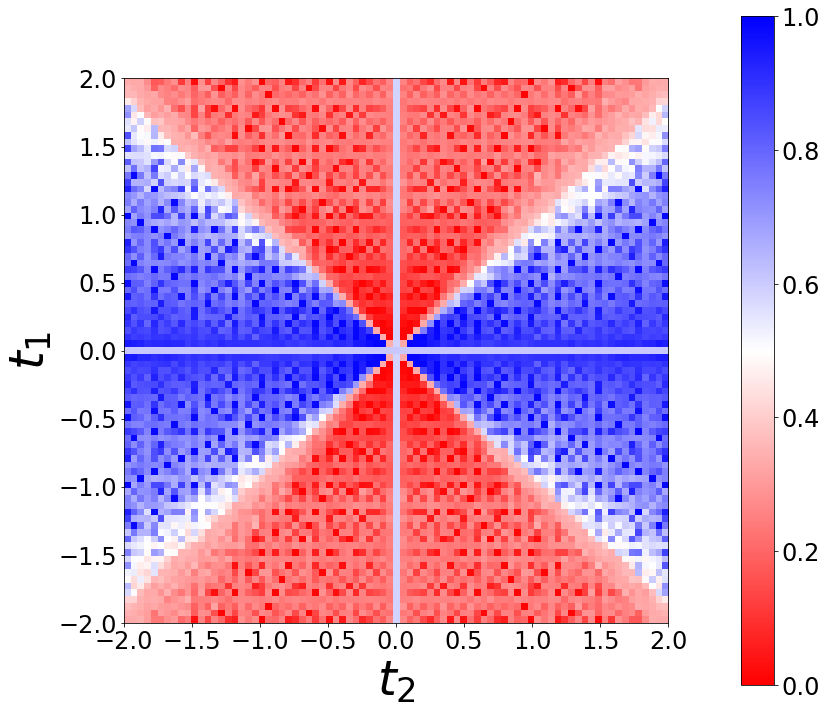

In [42]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_feat_1_138_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features: 69,138

In [43]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 286 µs, sys: 7 µs, total: 293 µs
Wall time: 242 µs


In [44]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_70.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_feat_69_138"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [69,138]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.3 s, sys: 792 ms, total: 14.1 s
Wall time: 13.3 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317


### Running simulation

In [45]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [05:49<00:00,  3.41s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.031465,0.015874,...,0.111140,-0.115854,0.095882,-0.104443,0.073811,-0.085611,0.046495,-0.060694,0.015874,-0.031465
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.036551,0.018500,...,-0.117439,0.119091,-0.105692,0.112937,-0.083745,0.095882,-0.053715,0.069574,-0.018500,0.036551
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.041564,-0.021117,...,-0.119032,0.116440,-0.112937,0.117851,-0.092640,0.104443,-0.060694,0.077902,-0.021117,0.041564
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.046495,-0.023723,...,0.115854,-0.108033,0.117439,-0.119032,0.100387,-0.111140,0.067403,-0.085611,0.023723,-0.046495
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.051333,0.026317,...,0.108033,-0.094285,0.119091,-0.116440,0.106889,-0.115854,0.073811,-0.092640,0.026317,-0.051333


#### Loading simulation

In [46]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_feat_69_138"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [47]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 139223.76it/s]


#### Computing mean accuracies with features 69,138

In [48]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


{'eigenvector_train': 0.987888874614594,
 'eigenvector_val': 0.9230811142857143,
 'eigenvector_test': 0.6822749822316985,
 'hamiltonian_train': 0.9883453237410075,
 'hamiltonian_val': 0.9852900000000002,
 'hamiltonian_test': 0.9611542288557214}

#### Plotting heatmap for features 69,138

Skipping winding 0
Plotting winding 1


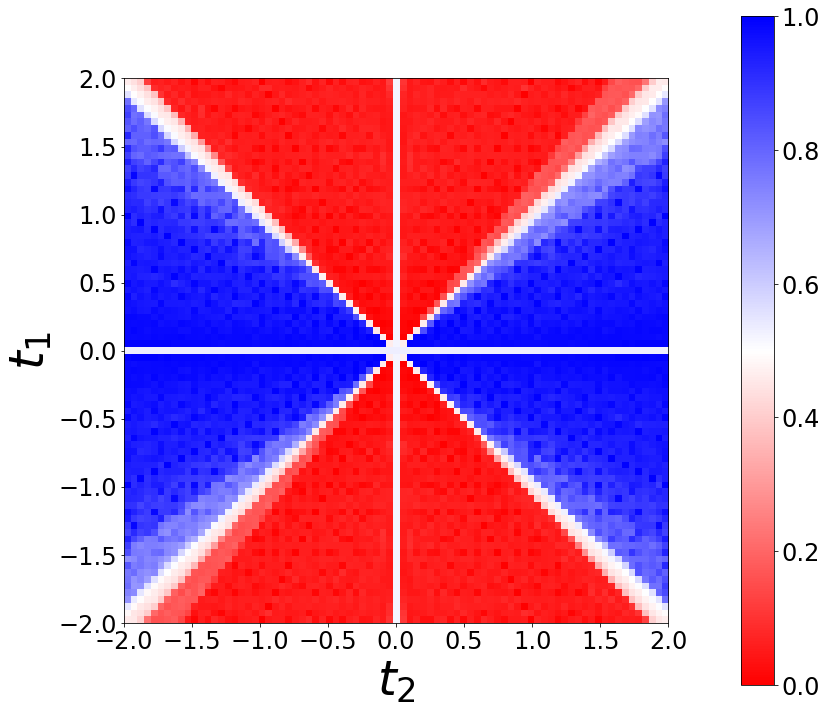

In [49]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_feat_69_138_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features (2 random features)

In [50]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_70.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_random_feat_2"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.3 s, sys: 780 ms, total: 14.1 s
Wall time: 13.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317


#### Running simulation

In [51]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]


running experiments:   1%|          | 1/100 [00:04<06:42,  4.07s/it]

random_features:  [136 114]


running experiments:   2%|▏         | 2/100 [00:07<06:26,  3.94s/it]

random_features:  [61 14]


running experiments:   3%|▎         | 3/100 [00:11<06:15,  3.87s/it]

random_features:  [20 87]


running experiments:   4%|▍         | 4/100 [00:14<06:01,  3.77s/it]

random_features:  [76 15]


running experiments:   5%|▌         | 5/100 [00:18<05:53,  3.72s/it]

random_features:  [128   6]


running experiments:   6%|▌         | 6/100 [00:22<05:44,  3.67s/it]

random_features:  [137  86]


running experiments:   7%|▋         | 7/100 [00:25<05:41,  3.67s/it]

random_features:  [107  62]


running experiments:   8%|▊         | 8/100 [00:29<05:34,  3.64s/it]

random_features:  [63 35]


running experiments:   9%|▉         | 9/100 [00:32<05:25,  3.58s/it]

random_features:  [25 94]


running experiments:  10%|█         | 10/100 [00:36<05:21,  3.57s/it]

random_features:  [ 25 133]


running experiments:  11%|█         | 11/100 [00:39<05:16,  3.56s/it]

random_features:  [ 43 114]


running experiments:  12%|█▏        | 12/100 [00:43<05:14,  3.58s/it]

random_features:  [ 61 103]


running experiments:  13%|█▎        | 13/100 [00:47<05:12,  3.59s/it]

random_features:  [ 11 109]


running experiments:  14%|█▍        | 14/100 [00:50<05:08,  3.58s/it]

random_features:  [ 87 107]


running experiments:  15%|█▌        | 15/100 [00:54<05:00,  3.54s/it]

random_features:  [ 6 83]


running experiments:  16%|█▌        | 16/100 [00:57<04:57,  3.54s/it]

random_features:  [ 62 133]


running experiments:  17%|█▋        | 17/100 [01:01<04:58,  3.59s/it]

random_features:  [86 67]


running experiments:  18%|█▊        | 18/100 [01:04<04:55,  3.60s/it]

random_features:  [135 124]


running experiments:  19%|█▉        | 19/100 [01:08<04:52,  3.61s/it]

random_features:  [115  98]


running experiments:  20%|██        | 20/100 [01:12<04:48,  3.60s/it]

random_features:  [30 48]


running experiments:  21%|██        | 21/100 [01:15<04:41,  3.57s/it]

random_features:  [112 106]


running experiments:  22%|██▏       | 22/100 [01:19<04:39,  3.58s/it]

random_features:  [ 89 120]


running experiments:  23%|██▎       | 23/100 [01:22<04:34,  3.56s/it]

random_features:  [71 32]


running experiments:  24%|██▍       | 24/100 [01:26<04:27,  3.51s/it]

random_features:  [8 5]


running experiments:  25%|██▌       | 25/100 [01:29<04:23,  3.52s/it]

random_features:  [117 138]


running experiments:  26%|██▌       | 26/100 [01:33<04:18,  3.49s/it]

random_features:  [123  68]


running experiments:  27%|██▋       | 27/100 [01:36<04:10,  3.43s/it]

random_features:  [ 9 60]


running experiments:  28%|██▊       | 28/100 [01:39<04:08,  3.46s/it]

random_features:  [ 56 110]


running experiments:  29%|██▉       | 29/100 [01:43<04:08,  3.49s/it]

random_features:  [ 0 31]


running experiments:  30%|███       | 30/100 [01:47<04:09,  3.56s/it]

random_features:  [28 82]


running experiments:  31%|███       | 31/100 [01:51<04:10,  3.63s/it]

random_features:  [10 98]


running experiments:  32%|███▏      | 32/100 [01:54<04:11,  3.69s/it]

random_features:  [119 106]


running experiments:  33%|███▎      | 33/100 [01:58<04:08,  3.70s/it]

random_features:  [90 86]


running experiments:  34%|███▍      | 34/100 [02:02<04:02,  3.68s/it]

random_features:  [130 113]


running experiments:  35%|███▌      | 35/100 [02:05<03:54,  3.61s/it]

random_features:  [  5 118]


running experiments:  36%|███▌      | 36/100 [02:09<03:50,  3.61s/it]

random_features:  [ 23 102]


running experiments:  37%|███▋      | 37/100 [02:12<03:47,  3.61s/it]

random_features:  [48 97]


running experiments:  38%|███▊      | 38/100 [02:16<03:43,  3.60s/it]

random_features:  [ 46 118]


running experiments:  39%|███▉      | 39/100 [02:20<03:38,  3.59s/it]

random_features:  [58 37]


running experiments:  40%|████      | 40/100 [02:23<03:34,  3.58s/it]

random_features:  [105 132]


running experiments:  41%|████      | 41/100 [02:27<03:30,  3.57s/it]

random_features:  [18 82]


running experiments:  42%|████▏     | 42/100 [02:30<03:24,  3.52s/it]

random_features:  [97 33]


running experiments:  43%|████▎     | 43/100 [02:34<03:19,  3.50s/it]

random_features:  [132 136]


running experiments:  44%|████▍     | 44/100 [02:37<03:14,  3.48s/it]

random_features:  [ 81 127]


running experiments:  45%|████▌     | 45/100 [02:41<03:14,  3.53s/it]

random_features:  [42 91]


running experiments:  46%|████▌     | 46/100 [02:44<03:11,  3.55s/it]

random_features:  [102  54]


running experiments:  47%|████▋     | 47/100 [02:48<03:08,  3.55s/it]

random_features:  [13 31]


running experiments:  48%|████▊     | 48/100 [02:51<03:04,  3.54s/it]

random_features:  [70 46]


running experiments:  49%|████▉     | 49/100 [02:55<03:01,  3.56s/it]

random_features:  [30  6]


running experiments:  50%|█████     | 50/100 [02:58<02:55,  3.51s/it]

random_features:  [19 71]


running experiments:  51%|█████     | 51/100 [03:02<02:49,  3.45s/it]

random_features:  [ 75 115]


running experiments:  52%|█████▏    | 52/100 [03:05<02:45,  3.45s/it]

random_features:  [24 40]


running experiments:  53%|█████▎    | 53/100 [03:08<02:41,  3.44s/it]

random_features:  [ 0 54]


running experiments:  54%|█████▍    | 54/100 [03:12<02:38,  3.45s/it]

random_features:  [86 53]


running experiments:  55%|█████▌    | 55/100 [03:16<02:41,  3.59s/it]

random_features:  [32 94]


running experiments:  56%|█████▌    | 56/100 [03:19<02:36,  3.56s/it]

random_features:  [95 36]


running experiments:  57%|█████▋    | 57/100 [03:23<02:31,  3.53s/it]

random_features:  [  6 135]


running experiments:  58%|█████▊    | 58/100 [03:26<02:29,  3.55s/it]

random_features:  [56  6]


running experiments:  59%|█████▉    | 59/100 [03:30<02:26,  3.58s/it]

random_features:  [ 75 137]


running experiments:  60%|██████    | 60/100 [03:34<02:23,  3.59s/it]

random_features:  [59  7]


running experiments:  61%|██████    | 61/100 [03:37<02:19,  3.58s/it]

random_features:  [97 49]


running experiments:  62%|██████▏   | 62/100 [03:41<02:15,  3.55s/it]

random_features:  [123 131]


running experiments:  63%|██████▎   | 63/100 [03:44<02:10,  3.53s/it]

random_features:  [110 121]


running experiments:  64%|██████▍   | 64/100 [03:48<02:06,  3.51s/it]

random_features:  [ 28 103]


running experiments:  65%|██████▌   | 65/100 [03:51<02:02,  3.51s/it]

random_features:  [ 64 108]


running experiments:  66%|██████▌   | 66/100 [03:55<02:02,  3.61s/it]

random_features:  [47 27]


running experiments:  67%|██████▋   | 67/100 [03:59<02:01,  3.69s/it]

random_features:  [96 49]


running experiments:  68%|██████▊   | 68/100 [04:03<01:59,  3.74s/it]

random_features:  [ 58 107]


running experiments:  69%|██████▉   | 69/100 [04:06<01:54,  3.69s/it]

random_features:  [83 48]


running experiments:  70%|███████   | 70/100 [04:10<01:49,  3.65s/it]

random_features:  [80 12]


running experiments:  71%|███████   | 71/100 [04:13<01:45,  3.63s/it]

random_features:  [127  88]


running experiments:  72%|███████▏  | 72/100 [04:17<01:42,  3.65s/it]

random_features:  [ 55 136]


running experiments:  73%|███████▎  | 73/100 [04:21<01:38,  3.64s/it]

random_features:  [104 109]


running experiments:  74%|███████▍  | 74/100 [04:24<01:34,  3.63s/it]

random_features:  [ 43 102]


running experiments:  75%|███████▌  | 75/100 [04:28<01:30,  3.61s/it]

random_features:  [127  91]


running experiments:  76%|███████▌  | 76/100 [04:31<01:25,  3.54s/it]

random_features:  [125   3]


running experiments:  77%|███████▋  | 77/100 [04:35<01:20,  3.52s/it]

random_features:  [122  10]


running experiments:  78%|███████▊  | 78/100 [04:38<01:17,  3.51s/it]

random_features:  [ 2 24]


running experiments:  79%|███████▉  | 79/100 [04:42<01:17,  3.70s/it]

random_features:  [ 13 114]


running experiments:  80%|████████  | 80/100 [04:46<01:15,  3.76s/it]

random_features:  [ 8 51]


running experiments:  81%|████████  | 81/100 [04:50<01:13,  3.85s/it]

random_features:  [100  14]


running experiments:  82%|████████▏ | 82/100 [04:54<01:08,  3.80s/it]

random_features:  [ 97 103]


running experiments:  83%|████████▎ | 83/100 [04:58<01:03,  3.75s/it]

random_features:  [ 8 62]


running experiments:  84%|████████▍ | 84/100 [05:01<01:00,  3.76s/it]

random_features:  [116  69]


running experiments:  85%|████████▌ | 85/100 [05:05<00:56,  3.76s/it]

random_features:  [25 61]


running experiments:  86%|████████▌ | 86/100 [05:09<00:52,  3.74s/it]

random_features:  [107  97]


running experiments:  87%|████████▋ | 87/100 [05:13<00:48,  3.72s/it]

random_features:  [  3 126]


running experiments:  88%|████████▊ | 88/100 [05:16<00:44,  3.75s/it]

random_features:  [27 19]


running experiments:  89%|████████▉ | 89/100 [05:20<00:41,  3.76s/it]

random_features:  [122  64]


running experiments:  90%|█████████ | 90/100 [05:24<00:37,  3.79s/it]

random_features:  [95 72]


running experiments:  91%|█████████ | 91/100 [05:28<00:33,  3.73s/it]

random_features:  [67 76]


running experiments:  92%|█████████▏| 92/100 [05:31<00:29,  3.68s/it]

random_features:  [65 54]


running experiments:  93%|█████████▎| 93/100 [05:35<00:25,  3.64s/it]

random_features:  [89 35]


running experiments:  94%|█████████▍| 94/100 [05:38<00:21,  3.61s/it]

random_features:  [35 18]


running experiments:  95%|█████████▌| 95/100 [05:42<00:17,  3.57s/it]

random_features:  [43 24]


running experiments:  96%|█████████▌| 96/100 [05:45<00:14,  3.59s/it]

random_features:  [126 118]


running experiments:  97%|█████████▋| 97/100 [05:49<00:10,  3.58s/it]

random_features:  [127  83]


running experiments:  98%|█████████▊| 98/100 [05:52<00:07,  3.53s/it]

random_features:  [39 93]


running experiments:  99%|█████████▉| 99/100 [05:56<00:03,  3.53s/it]

random_features:  [113  73]


running experiments: 100%|██████████| 100/100 [05:59<00:00,  3.49s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.005305,-0.002653,...,0.023723,-0.026317,0.018500,-0.021117,0.013241,-0.015874,0.007955,-0.010600,0.002653,-0.005305
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010600,0.005305,...,0.046495,-0.051333,0.036551,-0.041564,0.026317,-0.031465,0.015874,-0.021117,0.005305,-0.010600
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.015874,0.007955,...,-0.067403,0.073811,-0.053715,0.060694,-0.039067,0.046495,-0.023723,0.031465,-0.007955,0.015874
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.021117,-0.010600,...,-0.085611,0.092640,-0.069574,0.077902,-0.051333,0.060694,-0.031465,0.041564,-0.010600,0.021117
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.026317,0.013241,...,-0.100387,0.106889,-0.083745,0.092640,-0.062962,0.073811,-0.039067,0.051333,-0.013241,0.026317
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.031465,0.015874,...,0.111140,-0.115854,0.095882,-0.104443,0.073811,-0.085611,0.046495,-0.060694,0.015874,-0.031465
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.036551,0.018500,...,-0.117439,0.119091,-0.105692,0.112937,-0.083745,0.095882,-0.053715,0.069574,-0.018500,0.036551
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.041564,-0.021117,...,-0.119032,0.116440,-0.112937,0.117851,-0.092640,0.104443,-0.060694,0.077902,-0.021117,0.041564
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.046495,-0.023723,...,0.115854,-0.108033,0.117439,-0.119032,0.100387,-0.111140,0.067403,-0.085611,0.023723,-0.046495
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.051333,0.026317,...,0.108033,-0.094285,0.119091,-0.116440,0.106889,-0.115854,0.073811,-0.092640,0.026317,-0.051333


#### Loading simulation with random features

In [52]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_70_random_feat_2"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary for simulation with random features

In [53]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 141696.98it/s]


#### Computing mean accuracies for simulation with random features

In [54]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


{'eigenvector_train': 0.9872362538540596,
 'eigenvector_val': 0.9433888285714285,
 'eigenvector_test': 0.7145358208955223,
 'hamiltonian_train': 0.9883812949640287,
 'hamiltonian_val': 0.98387,
 'hamiltonian_test': 0.8907263681592041}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


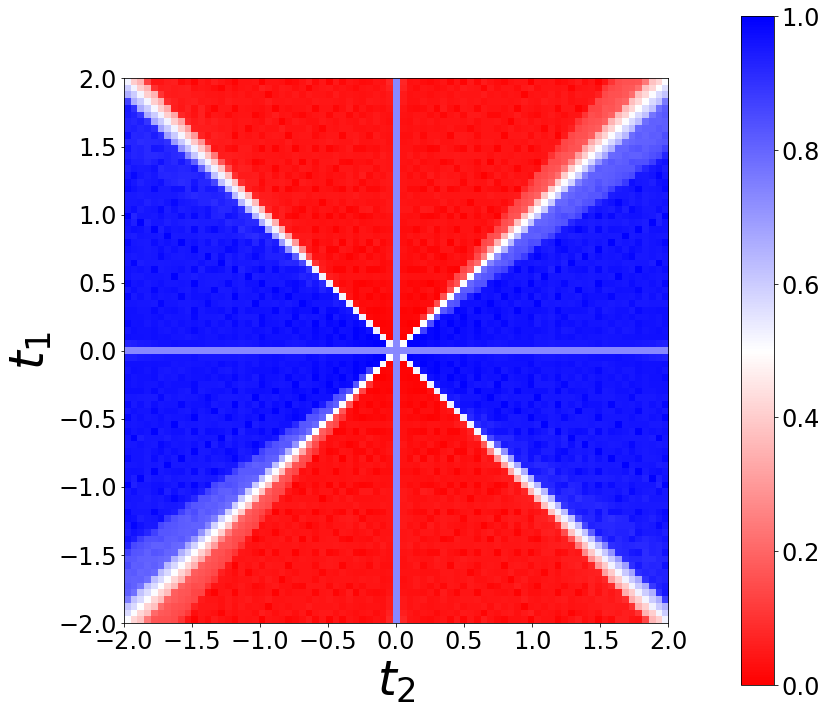

In [55]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_70_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)